In [1]:
import random

# --- 1. 문제 정의 (환경) ---
def calculate_fitness(individual):
    """
    유전자(individual)의 적합도(이익)를 계산합니다.
    individual = [책상(x1), 의자(x2)]
    """
    x1, x2 = individual

    # 제약 조건 확인
    # 1. 생산량은 음수가 될 수 없음
    if x1 < 0 or x2 < 0:
        return 0  # 생존 불가 (적합도 0)

    # 2. 자원 제약 (목재, 노동력)
    wood_usage = 2*x1 + 1*x2
    labor_usage = 1*x1 + 2*x2

    if wood_usage > 100 or labor_usage > 80:
        return 0 # 자원 초과로 생산 불가 (적합도 0)

    # 3. 이익 계산 (목적 함수)
    profit = 5*x1 + 3*x2
    return profit

# --- 2. 유전 알고리즘 함수들 ---

def create_individual():
    """랜덤한 초기 생산 계획 생성 (0~60 사이)"""
    return [random.uniform(0, 60), random.uniform(0, 60)]

def crossover(parent1, parent2):
    """교차: 부모의 형질을 섞어 자식 생성 (평균값 사용)"""
    child = []
    for i in range(len(parent1)):
        # 부모 유전자의 중간값 + 약간의 랜덤성
        val = (parent1[i] + parent2[i]) / 2
        child.append(val)
    return child

def mutate(individual, mutation_rate=0.1):
    """변이: 확률적으로 유전자 값을 조금 변경"""
    if random.random() < mutation_rate:
        idx = random.randint(0, 1) # x1 또는 x2 중 하나 선택
        individual[idx] += random.uniform(-5, 5) # -5 ~ +5 범위로 미세 조정
    return individual

# --- 3. 메인 실행 루프 ---

def run_genetic_algorithm():
    # 설정값
    POPULATION_SIZE = 50   # 한 세대 개체 수
    GENERATIONS = 100      # 반복할 세대 수
    TOP_PERFORMERS = 10    # 다음 세대로 넘길 우수 유전자 수

    # 1세대 초기화
    population = [create_individual() for _ in range(POPULATION_SIZE)]

    print(f"--- 유전 알고리즘 시작 ({GENERATIONS} 세대) ---")

    for gen in range(GENERATIONS):
        # 1. 모든 개체의 적합도 계산 및 정렬 (내림차순)
        # (fitness, individual) 튜플로 묶어서 정렬
        scored_population = [(calculate_fitness(ind), ind) for ind in population]
        scored_population.sort(key=lambda x: x[0], reverse=True)

        # 현재 세대 최고 기록 출력 (10세대마다)
        best_score, best_ind = scored_population[0]
        if gen % 10 == 0:
            print(f"Gen {gen}: 이익 {best_score:.2f}만원 (책상 {best_ind[0]:.1f}, 의자 {best_ind[1]:.1f})")

        # 2. 선택 (상위 개체만 살아남음)
        top_individuals = [ind for score, ind in scored_population[:TOP_PERFORMERS]]

        # 3. 다음 세대 생성
        next_generation = []

        # 3-1. 엘리트 보존 (상위 개체는 그대로 다음 세대로 - 가장 좋은 유전자가 사라지는 것 방지)
        next_generation.extend(top_individuals)

        # 3-2. 자식 생성 (부족한 인원만큼 채우기)
        while len(next_generation) < POPULATION_SIZE:
            # 상위 개체 중 무작위로 부모 선택
            p1 = random.choice(top_individuals)
            p2 = random.choice(top_individuals)

            # 교차 및 변이
            child = crossover(p1, p2)
            child = mutate(child)

            next_generation.append(child)

        population = next_generation

    # 최종 결과
    final_best_score, final_best_ind = scored_population[0]
    print("-" * 40)
    print("--- 최종 최적해 (근사값) ---")
    print(f"책상 생산량: {final_best_ind[0]:.4f}개 (정답: 40)")
    print(f"의자 생산량: {final_best_ind[1]:.4f}개 (정답: 20)")
    print(f"최대 이익  : {final_best_score:.4f}만원 (정답: 260)")

# 실행
run_genetic_algorithm()

--- 유전 알고리즘 시작 (100 세대) ---
Gen 0: 이익 245.65만원 (책상 40.3, 의자 14.7)
Gen 10: 이익 258.64만원 (책상 41.3, 의자 17.4)
Gen 20: 이익 258.64만원 (책상 41.3, 의자 17.4)
Gen 30: 이익 258.64만원 (책상 41.3, 의자 17.4)
Gen 40: 이익 258.64만원 (책상 41.3, 의자 17.4)
Gen 50: 이익 258.64만원 (책상 41.3, 의자 17.4)
Gen 60: 이익 258.64만원 (책상 41.3, 의자 17.4)
Gen 70: 이익 258.64만원 (책상 41.3, 의자 17.4)
Gen 80: 이익 258.64만원 (책상 41.3, 의자 17.4)
Gen 90: 이익 258.64만원 (책상 41.3, 의자 17.4)
----------------------------------------
--- 최종 최적해 (근사값) ---
책상 생산량: 41.2649개 (정답: 40)
의자 생산량: 17.4369개 (정답: 20)
최대 이익  : 258.6351만원 (정답: 260)


데이터 다운로드 중... (2022-01-01 ~ 2023-12-31)
데이터 로드 완료!

--- 최적화 시작 (50 세대) ---
Gen 0: 최고 샤프 지수 = 0.0909
Gen 10: 최고 샤프 지수 = 0.1782
Gen 20: 최고 샤프 지수 = 0.1950
Gen 30: 최고 샤프 지수 = 0.2207
Gen 40: 최고 샤프 지수 = 0.2367
--------------------------------------------------
최종 샤프 지수: 0.2459
예상 연 수익률: 11.32%
예상 연 변동성: 31.79%
--------------------------------------------------


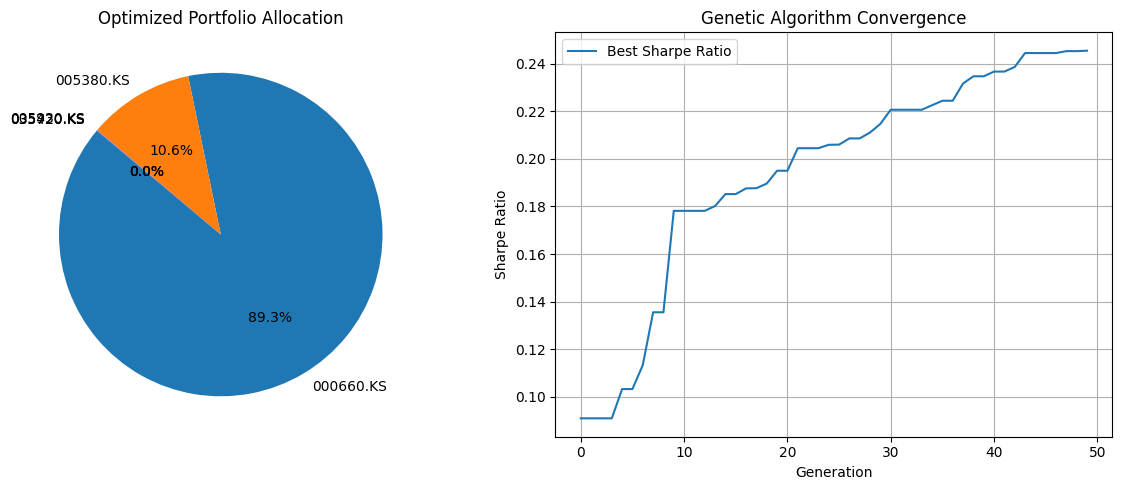

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# --- 설정 및 데이터 로드 ---
# 한국 대표 우량주 5개 (종목코드.KS)
TICKERS = ['005930.KS', '000660.KS', '035420.KS', '035720.KS', '005380.KS']
ASSET_NAMES = ['삼성전자', 'SK하이닉스', 'NAVER', '카카오', '현대차']

START_DATE = "2022-01-01"
END_DATE = "2023-12-31"
RISK_FREE_RATE = 0.035  # 무위험 이자율 (예: 연 3.5%)

def get_market_data(tickers, start, end):
    print(f"데이터 다운로드 중... ({start} ~ {end})")
    # Download data with auto_adjust=True to get already adjusted close prices
    # We will then just select the 'Close' column which will be the adjusted close.
    # Setting progress=False to avoid verbose output during download.
    data = yf.download(tickers, start=start, end=end, progress=False, auto_adjust=True)

    if data.empty:
        raise ValueError("No data downloaded for the specified tickers and date range.")

    # For multiple tickers, yfinance returns a MultiIndex DataFrame.
    # 'Close' column contains the adjusted close when auto_adjust=True.
    if isinstance(data.columns, pd.MultiIndex):
        # Select 'Close' price for all tickers
        price_data = data['Close']
    elif 'Close' in data.columns:
        # Single ticker case or if 'Close' is a top-level column (less common for multiple)
        price_data = data[['Close']]
    else:
        raise ValueError("Neither 'Adj Close' nor 'Close' column found in downloaded data.")

    # Remove any columns (tickers) that are entirely NaN after selection
    price_data = price_data.dropna(axis=1, how='all')

    if price_data.empty:
        raise ValueError("No valid price data after cleaning. All tickers might have failed to download.")

    # Fill any remaining NaNs (e.g., for missing days, or if a stock IPO'd mid-period)
    # Forward fill then backward fill.
    price_data = price_data.ffill().bfill()

    # Drop any rows that are still NaN (e.g., if first few rows were NaN and bfill couldn't fill)
    price_data = price_data.dropna()

    if price_data.empty:
        raise ValueError("Price data became empty after filling NaNs and dropping remaining NaNs.")


    # 일간 수익률 계산
    daily_returns = price_data.pct_change().dropna()

    if daily_returns.empty:
        raise ValueError("No valid daily returns after cleaning. Check date range or data availability.")

    # 연간 기대 수익률 (일간 평균 * 252일)
    mean_returns = daily_returns.mean() * 252

    # 연간 공분산 행렬 (일간 공분산 * 252일)
    cov_matrix = daily_returns.cov() * 252

    return mean_returns, cov_matrix, price_data

# Initialize mean_returns and cov_matrix to None or empty structures
mean_returns = None
cov_matrix = None
price_data = None
NUM_ASSETS = 0 # Initialize to 0, will be updated if data loads successfully

# 실제 데이터 로드
try:
    mean_returns, cov_matrix, price_data = get_market_data(TICKERS, START_DATE, END_DATE)
    # Update NUM_ASSETS only if data loading is successful
    NUM_ASSETS = len(mean_returns)
    print("데이터 로드 완료!\n")
except Exception as e:
    print(f"데이터 로드 실패: {e}")
    # In a Colab environment, raising a SystemExit might stop the cell execution.
    # Or, for a clearer message to the user and to stop further execution in the cell,
    # it's better to explicitly raise a more specific exception.
    raise RuntimeError(f"데이터 로딩 중 치명적인 오류 발생: {e}. 포트폴리오 최적화를 계속할 수 없습니다.")

# --- 유전 알고리즘 (GA) 정의 ---

def create_portfolio():
    """랜덤 비중 생성 (합이 1)"""
    if NUM_ASSETS == 0:
        raise ValueError("NUM_ASSETS is 0. Data loading failed or resulted in no valid assets.")
    weights = np.random.random(NUM_ASSETS)
    return weights / np.sum(weights)

def get_sharpe_ratio(weights):
    """샤프 지수 계산 (적합도 함수)"""
    # Ensure mean_returns and cov_matrix are not None before use
    if mean_returns is None or cov_matrix is None:
        raise ValueError("Market data (mean_returns, cov_matrix) not loaded. Cannot calculate Sharpe Ratio.")

    # 수익률 = 비중 * 기대수익률
    returns = np.sum(weights * mean_returns)
    # 변동성(위험) = sqrt(W^T * Cov * W)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    # 샤프 지수
    sharpe = (returns - RISK_FREE_RATE) / volatility
    return sharpe, returns, volatility

def crossover(parent1, parent2):
    """교차: 두 부모의 가중치를 섞음"""
    alpha = random.random()
    child = alpha * parent1 + (1-alpha) * parent2
    return child

def mutate(individual, rate=0.1, strength=0.05):
    """변이: 확률적으로 유전자 값을 조금 변경"""
    if random.random() < rate:
        idx = random.randint(0, NUM_ASSETS-1)
        # 랜덤 노이즈 추가
        individual[idx] += np.random.normal(0, strength)
        # 음수 비중 방지 (공매도 제한) 및 정규화
        individual = np.maximum(individual, 0)
        if np.sum(individual) == 0: # Avoid division by zero if all elements are 0
            # If all weights become zero, re-initialize randomly
            individual = np.random.random(NUM_ASSETS)
        individual /= np.sum(individual)
    return individual

# --- 메인 실행 루프 ---

def run_portfolio_optimization():
    # Only run if data was successfully loaded and NUM_ASSETS is valid
    if NUM_ASSETS == 0 or mean_returns is None or cov_matrix is None:
        print("포트폴리오 최적화를 실행할 수 없습니다. 데이터 로드 오류가 발생했습니다.")
        return

    # GA 파라미터
    POP_SIZE = 100
    GENERATIONS = 50
    MUTATION_RATE = 0.1

    # 초기 세대
    population = [create_portfolio() for _ in range(POP_SIZE)]
    history = [] # 세대별 최고 점수 기록용

    print(f"--- 최적화 시작 ({GENERATIONS} 세대) ---")

    for gen in range(GENERATIONS):
        # 1. 평가 (샤프지수 계산)
        # fitness_data = [(샤프지수, 비중배열), ...]
        fitness_data = []
        for ind in population:
            sharpe, _, _ = get_sharpe_ratio(ind)
            fitness_data.append((sharpe, ind))

        # 내림차순 정렬 (높은 샤프지수가 먼저 오도록)
        fitness_data.sort(key=lambda x: x[0], reverse=True)

        # 기록
        best_sharpe = fitness_data[0][0]
        history.append(best_sharpe)

        if gen % 10 == 0:
            print(f"Gen {gen}: 최고 샤프 지수 = {best_sharpe:.4f}")

        # 2. 선택 (상위 20% 우성 개체)
        top_n = int(POP_SIZE * 0.2)
        survivors = [ind for score, ind in fitness_data[:top_n]]

        # 3. 다음 세대 생성
        new_population = survivors[:] # 엘리트 보존

        while len(new_population) < POP_SIZE:
            # 무작위 부모 선택 및 번식
            p1 = random.choice(survivors)
            p2 = random.choice(survivors)
            child = crossover(p1, p2)
            child = mutate(child, rate=MUTATION_RATE)
            new_population.append(child)

        population = new_population

    # --- 최종 결과 출력 및 시각화 ---
    # Re-evaluate the final population to find the absolute best individual
    fitness_data = []
    for ind in population:
        sharpe, _, _ = get_sharpe_ratio(ind)
        fitness_data.append((sharpe, ind))
    fitness_data.sort(key=lambda x: x[0], reverse=True)


    final_best_sharpe, final_best_weights = fitness_data[0]
    final_sharpe, final_ret, final_vol = get_sharpe_ratio(final_best_weights)

    print("-" * 50)
    print(f"최종 샤프 지수: {final_sharpe:.4f}")
    print(f"예상 연 수익률: {final_ret*100:.2f}%")
    print(f"예상 연 변동성: {final_vol*100:.2f}%")
    print("-" * 50)

    # 한글 폰트 설정 (Mac: AppleGothic, Windows: Malgun Gothic, Colab: NanumBarunGothic)
    # 여기서는 폰트 깨짐 방지를 위해 영문으로 표기하거나 설정을 추가해야 합니다.
    # 편의상 시각화 라벨은 영문으로 처리합니다.

    # 1. 포트폴리오 비중 파이 차트
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    # 매핑된 종목명 가져오기 (yfinance 컬럼 순서 기준)
    tickers_in_order = price_data.columns.tolist() # Use columns from price_data as they are the valid tickers

    plt.pie(final_best_weights, labels=tickers_in_order, autopct='%1.1f%%', startangle=140)
    plt.title('Optimized Portfolio Allocation')

    # 2. 학습 곡선 (Generation vs Sharpe Ratio)
    plt.subplot(1, 2, 2)
    plt.plot(history, label='Best Sharpe Ratio')
    plt.xlabel('Generation')
    plt.ylabel('Sharpe Ratio')
    plt.title('Genetic Algorithm Convergence')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# 실행
run_portfolio_optimization()